# Practica 1

## Parte A

### Ejercicio 1:

In [97]:
# Cargar el fichero "titanic.csv" usando pandas
import pandas as pd
df = pd.read_csv("titanic.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [98]:
# Eliminar valores nulos y/o duplicados
df = df.dropna()
df = df.drop_duplicates()

# Resetear los indices
df = df.reset_index(drop=True)

print(df)

     PassengerId  Survived  Pclass  \
0              2         1       1   
1              4         1       1   
2              7         0       1   
3             11         1       3   
4             12         1       1   
..           ...       ...     ...   
178          872         1       1   
179          873         0       1   
180          880         1       1   
181          888         1       1   
182          890         1       1   

                                                  Name     Sex   Age  SibSp  \
0    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
2                              McCarthy, Mr. Timothy J    male  54.0      0   
3                      Sandstrom, Miss. Marguerite Rut  female   4.0      1   
4                             Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

Al completar los pasos del ejercicio 1, vemos que han borrado 891 - 183 = **708 filas**.

Su eliminación es importante por los siguientes razones:

1. Las filas con valores vacios (NULL) no contienen bastante informacion util para usarlas en el entrenamiento o validacion de un modelo de AA. Si intentaremos usarlas para estos escenarios, algunos de los features importantes para el entrenamiento van a faltar y al final podemos obtener un modelo con errores.
2. Los duplicados tampoco son utiles, porque no agregan ningun valor a los datos (ya sabemos que la fila con estos datos existe y no lo necesitamos decir otra vez).

### Ejercicio 2:

Los atributos que probablemente no seran utiles son:

1. **PassengerId** - el numero del pasajero no nos dice ninguna informacion sobre las calidades de persona que viajaba en el barco;
2. **Name** - el nombre del pasajero tampoco contiene caracteristicas del pasajero, que tienen alguna relacion con capacidad de supervivencia del dicho pasajero;
3. **Ticket** - el numero de boleto no nos dice ninguna informacion sobre las calidades de persona que viajaba en el barco;
4. **Embarked** - el hecho de que el barco se hundiera y la prioridad de los pasajeros para escapar no estuviera influenciada por la ciudad de abordaje.

In [99]:
# Eliminar columnas no necesarias
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Embarked"])
print(df)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare        Cabin
0           1       1  female  38.0      1      0  71.2833          C85
1           1       1  female  35.0      1      0  53.1000         C123
2           0       1    male  54.0      0      0  51.8625          E46
3           1       3  female   4.0      1      1  16.7000           G6
4           1       1  female  58.0      0      0  26.5500         C103
..        ...     ...     ...   ...    ...    ...      ...          ...
178         1       1  female  47.0      1      1  52.5542          D35
179         0       1    male  33.0      0      0   5.0000  B51 B53 B55
180         1       1  female  56.0      0      1  83.1583          C50
181         1       1  female  19.0      0      0  30.0000          B42
182         1       1    male  26.0      0      0  30.0000         C148

[183 rows x 8 columns]


### Ejercicio 3:

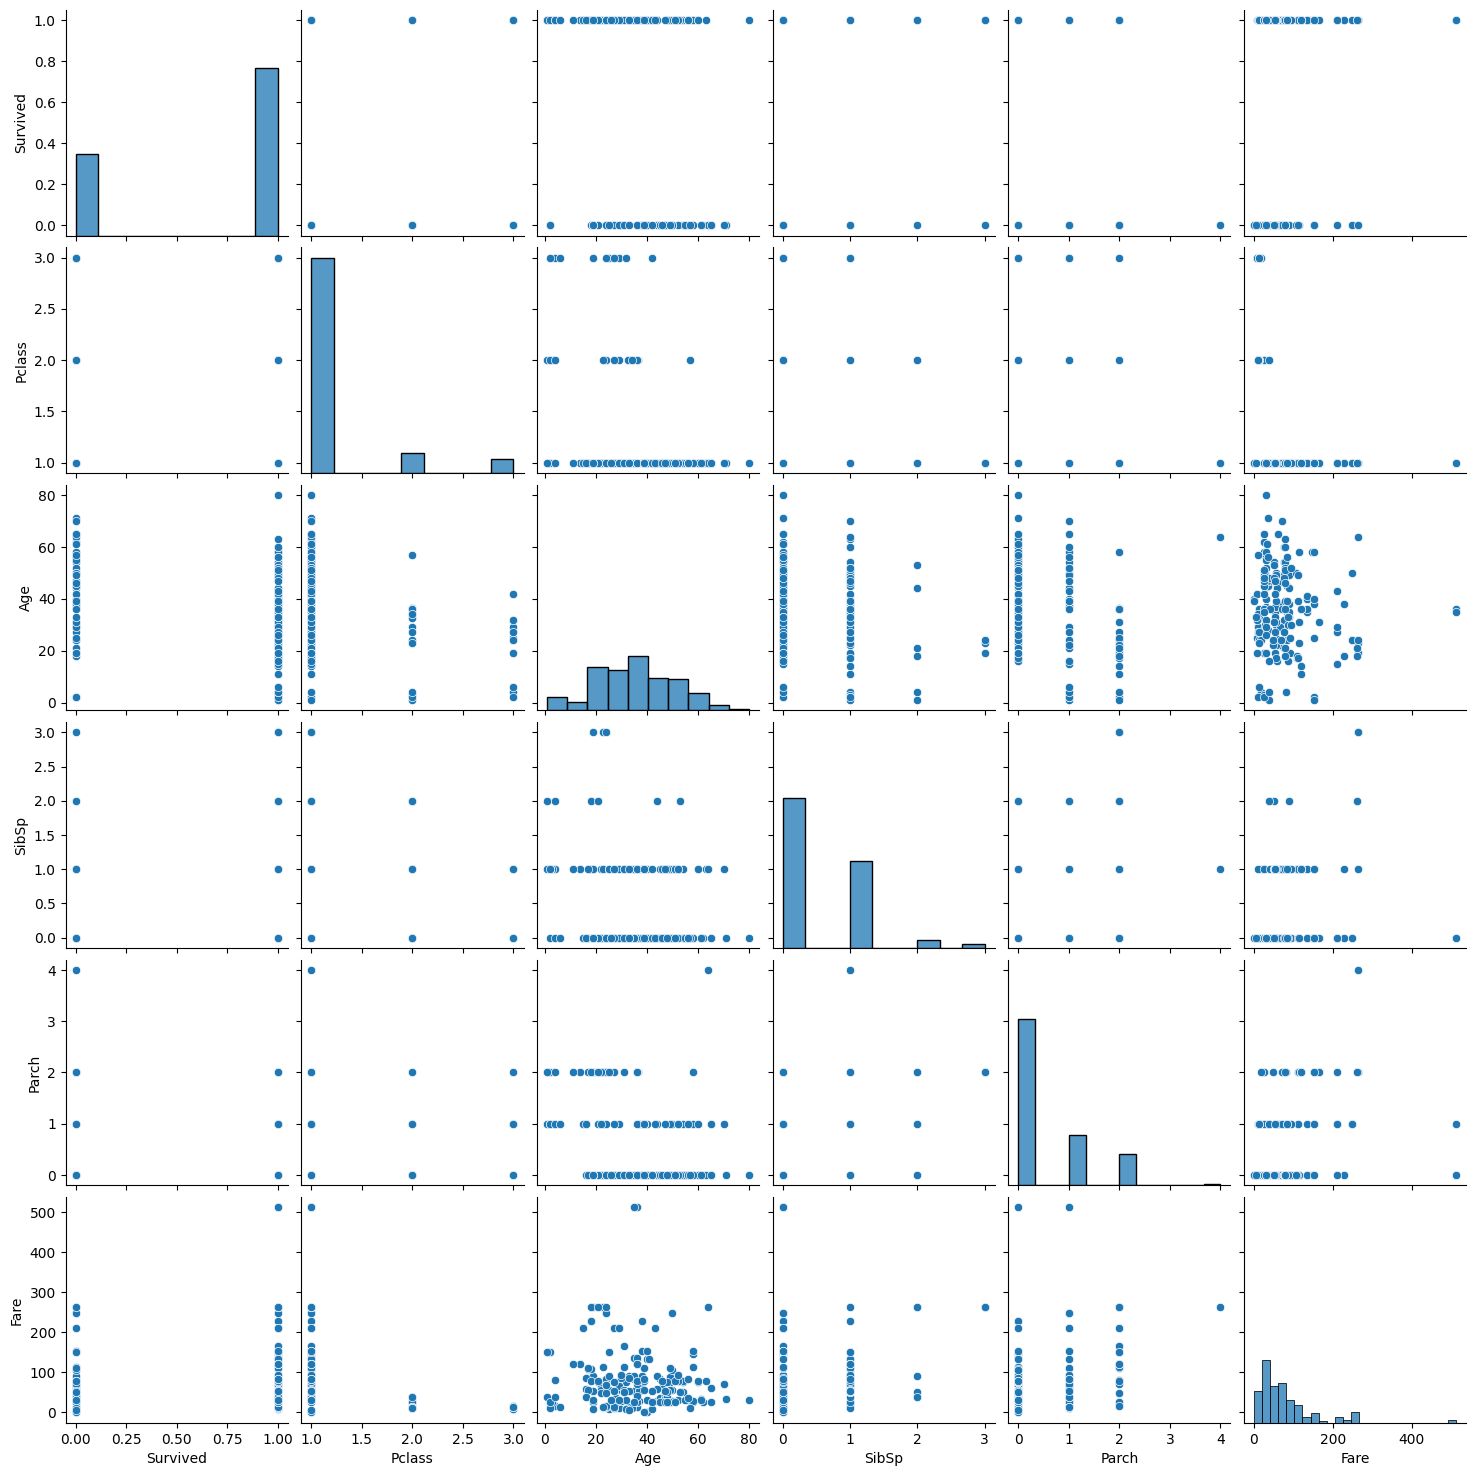

In [100]:
# Dibujar diagramas de dispersion

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.show()

In [101]:
# Calcular coeficientes de correlación

correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.034542 -0.254085  0.106346  0.023582  0.134241
Pclass   -0.034542  1.000000 -0.306514 -0.103592  0.047496 -0.315235
Age      -0.254085 -0.306514  1.000000 -0.156162 -0.271271 -0.092424
SibSp     0.106346 -0.103592 -0.156162  1.000000  0.255346  0.286433
Parch     0.023582  0.047496 -0.271271  0.255346  1.000000  0.389740
Fare      0.134241 -0.315235 -0.092424  0.286433  0.389740  1.000000


### Ejercicio 4:

In [102]:
# Remover datos no numericos de DataFrame (incluido los categoricos)

df_num = df.drop(columns=['Survived', 'Pclass'])


# Descripcion general de numericos
df_num.describe()

# Media - encontrar la tendencia general de los datos. Es sensitiva a outliers. Ejemplo: edad media del pasajero
# Desviacion tipica - mide cuánto se desvían los datos de la media.

,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000
mean,35.674426,0.464481,0.475410,78.682469
std,15.643866,0.644159,0.754617,76.347843
min,0.920000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,29.700000
50%,36.000000,0.000000,0.000000,57.000000
75%,47.500000,1.000000,1.000000,90.000000
max,80.000000,3.000000,4.000000,512.329200


from matplotlib import pyplot as plt
_df_47['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48['SibSp'].plot(kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['Parch'].plot(kind='hist', bins=20, title='Parch')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['Fare'].plot(kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52.plot(kind='scatter', x='SibSp', y='Parch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53.plot(kind='scatter', x='Parch', y='Fare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_55['SibSp'].plot(kind='line', figsize=(8, 4), title='SibSp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_56['Parch'].plot(kind='line', figsize=(8, 4), title='Parch')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_57['Fare'].plot(kind='line', figsize=(8, 4), title='Fare')
plt.gca().spines[['top', 'right']].set_visible(False)

In [103]:
# Calcular mediana
median = df_num.median(numeric_only=True)
print(median)

# Por ejemplo, aqui podemos ver que la mitad de pasajeros pagaron $57 por su viaje o mas

Age      36.0
SibSp     0.0
Parch     0.0
Fare     57.0
dtype: float64


In [104]:
# Calcular moda
mode = df_num.mode(numeric_only=True)
print(mode)

# En estos datos, podemos ver que la clase de de pasajeros mas comun es "1"

    Age  SibSp  Parch   Fare
0  36.0      0      0  26.55


In [105]:
# Calcular varianza - desviación tipica al cuadrado
variance = df_num.var(numeric_only=True)
print(variance)

Age       244.730542
SibSp       0.414940
Parch       0.569447
Fare     5828.993085
dtype: float64


In [106]:
# Calcular asimetria - mide la asimetría de la distribución
skewness = df_num.skew(numeric_only=True)
print(skewness)

Age      0.009676
SibSp    1.443019
Parch    1.519305
Fare     2.715883
dtype: float64


In [107]:
# Calcular curtosis - mide qué tan "puntiaguda" es la distribución
kurtosis = df_num.kurtosis(numeric_only=True)
print(kurtosis)

Age      -0.226184
SibSp     2.481957
Parch     1.986777
Fare     10.750636
dtype: float64


In [108]:
# Calcular covarianza - mide cómo dos variables se mueven juntas. No tiene un rango como la correlacion
cov = df_num.cov(numeric_only=True)
print(cov)

              Age      SibSp      Parch         Fare
Age    244.730542  -1.573661  -3.202391  -110.388782
SibSp   -1.573661   0.414940   0.124122    14.086806
Parch   -3.202391   0.124122   0.569447    22.454213
Fare  -110.388782  14.086806  22.454213  5828.993085




### Ejercicio 5:

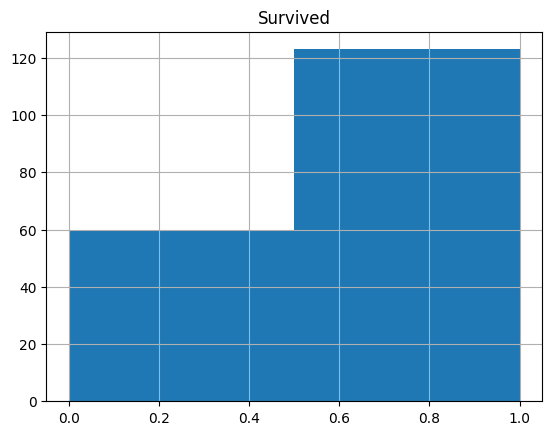

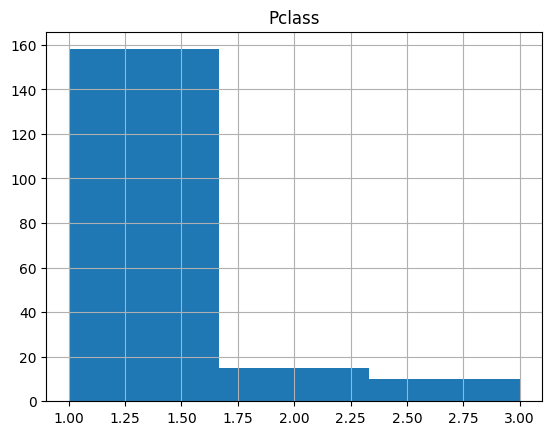

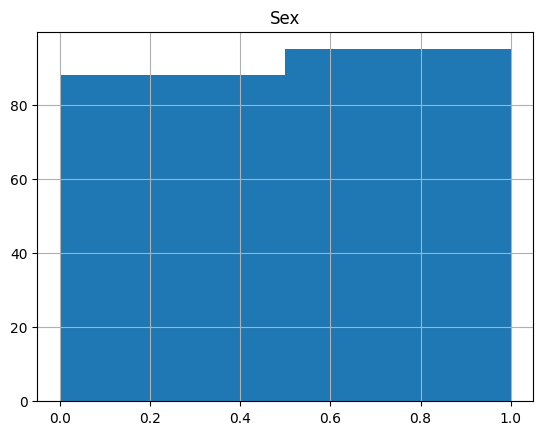

In [109]:
# Dibuja histograma de valores categoricos
df_cat = df.drop(columns=['Age', 'SibSp', 'Parch', 'Fare', 'Cabin'])

# Convertir columna 'Sex' a categorias numericas para poder incluir en histograma
df_cat["Sex"] = df_cat["Sex"].map({"male": 1, "female": 0})

df_cat.hist(column='Survived', bins=2)
df_cat.hist(column='Pclass', bins=3)
df_cat.hist(column='Sex', bins=2)

plt.show()

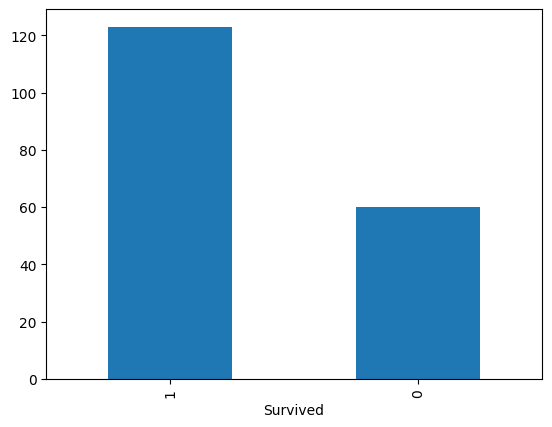

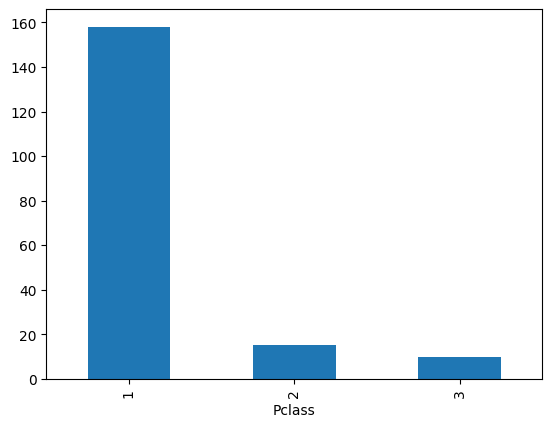

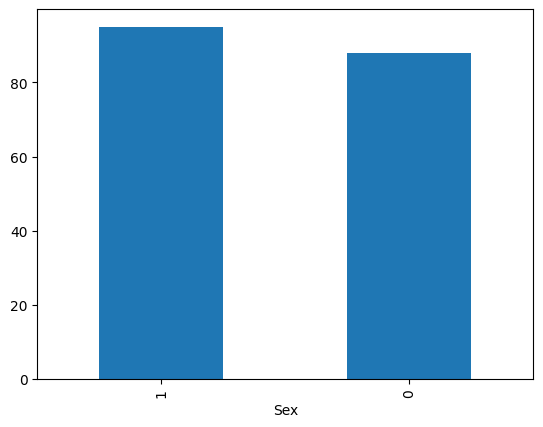

In [110]:
# Dibujar diagramas de barras de atributos categoricos
df_cat['Survived'].value_counts().plot(kind='bar')
plt.show()

df_cat['Pclass'].value_counts().plot(kind='bar')
plt.show()

df_cat['Sex'].value_counts().plot(kind='bar')
plt.show()

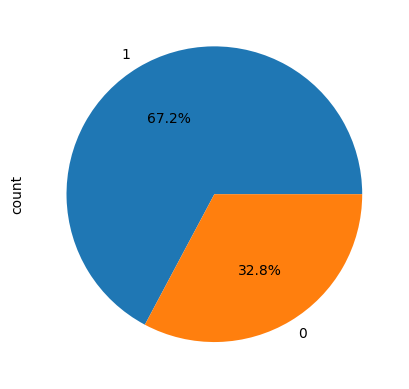

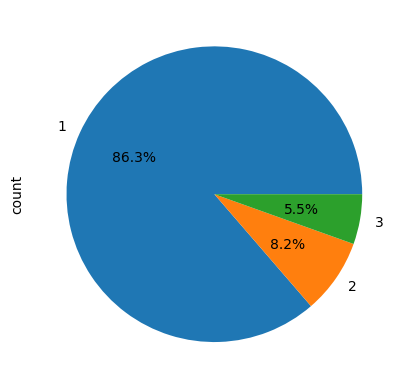

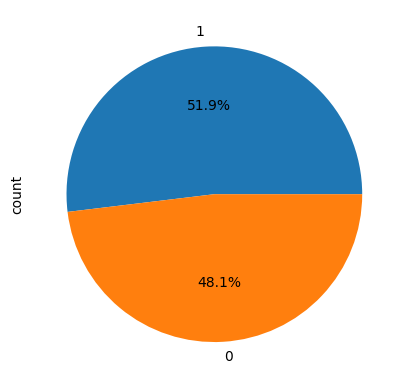

In [111]:
# Dibujar diagramas de tartas (con %) de atributos categoricos
df_cat['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

df_cat['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

df_cat['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [112]:
# Comprobar si los atributos categoricos estan balanceados
print(df_cat['Survived'].value_counts(normalize=True))
print()

print(df_cat['Pclass'].value_counts(normalize=True))
print()

print(df_cat['Sex'].value_counts(normalize=True))
print()

# Se puede ver, que no estan balanceados (hay clases que contienen la moyaria absoluta de los datos, mientras otras estan casi vacias)

Survived
1    0.672131
0    0.327869
Name: proportion, dtype: float64

Pclass
1    0.863388
2    0.081967
3    0.054645
Name: proportion, dtype: float64

Sex
1    0.519126
0    0.480874
Name: proportion, dtype: float64



### Ejercicio 6:

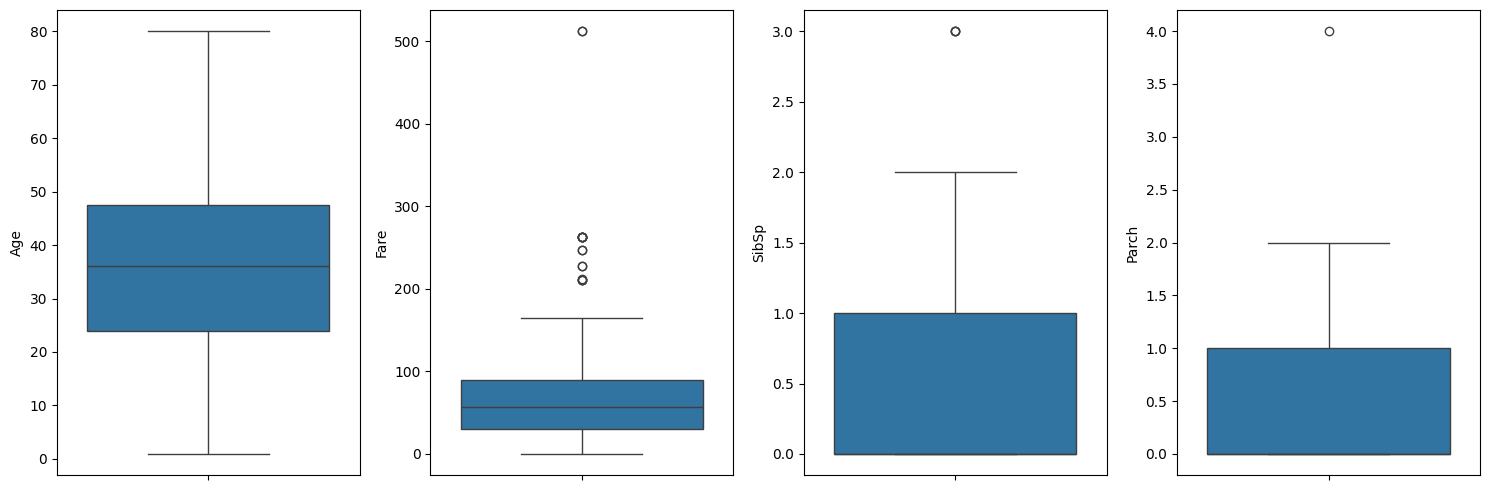

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir columnas numéricas para analizar outliers
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))

# Dibujar un boxplot (los bigotes - buen diagrama para ver los outliers) por cada columna numérica
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])

plt.tight_layout()
plt.show()

# En el resultado, podemos ver que hay outliers casi en todas columnas numericas (excepto 'Age')

### Ejercicio 7:

In [114]:
# Convertir atributos categoricos usando OneHotEncoder
df_onehot = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df_onehot.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male
0,1,1,38.0,1,0,71.2833,C85,False
1,1,1,35.0,1,0,53.1000,C123,False
2,0,1,54.0,0,0,51.8625,E46,True
3,1,3,4.0,1,1,16.7000,G6,False
4,1,1,58.0,0,0,26.5500,C103,False


In [115]:
# Convertir atributos categoricos usando LabelEncoder

from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

df['Sex_Label'] = label_enc.fit_transform(df['Sex'])
# df[['Sex', 'Sex_Label', ]].head()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Sex_Label
0,1,1,female,38.0,1,0,71.2833,C85,0
1,1,1,female,35.0,1,0,53.1000,C123,0
2,0,1,male,54.0,0,0,51.8625,E46,1
3,1,3,female,4.0,1,1,16.7000,G6,0
4,1,1,female,58.0,0,0,26.5500,C103,0


Conclusiones: para variables ordinales (e.g. Pclass) es mejor usar Label Encoder. One-Hot Encoding es mejor para variables nominales (e.g. Sex).

### Ejercicio 7:

In [120]:
# Normalizar y estandartizar dataset usando diferentes metodos

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

df_num = df.drop(columns=['Survived', 'Pclass', 'Cabin', 'Sex', 'Sex_Label'])
print(df_num.head())


    Age  SibSp  Parch     Fare
0  38.0      1      0  71.2833
1  35.0      1      0  53.1000
2  54.0      0      0  51.8625
3   4.0      1      1  16.7000
4  58.0      0      0  26.5500


In [124]:
# Aplicar Normalización (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
df_normalized = df_num.copy()
df_normalized = scaler_minmax.fit_transform(df_num)
df_normalized = pd.DataFrame(df_normalized, columns=num_cols)
print(df_normalized.head())

        Age      Fare  SibSp     Parch
0  0.468892  0.333333   0.00  0.139136
1  0.430956  0.333333   0.00  0.103644
2  0.671219  0.000000   0.00  0.101229
3  0.038948  0.333333   0.25  0.032596
4  0.721801  0.000000   0.00  0.051822


In [125]:
# Aplicar Estandarización (Z-score Scaling)
scaler_standard = StandardScaler()
df_standardized = df_num.copy()
df_standardized = scaler_standard.fit_transform(df_num[num_cols])
df_standardized = pd.DataFrame(df_standardized, columns=num_cols)
print(df_standardized.head())

        Age      Fare     SibSp     Parch
0  0.149065 -0.097180  0.833628 -0.631730
1 -0.043230 -0.335997  0.833628 -0.631730
2  1.174636 -0.352250 -0.723044 -0.631730
3 -2.030273 -0.814070  0.833628  0.697081
4  1.431029 -0.684702 -0.723044 -0.631730


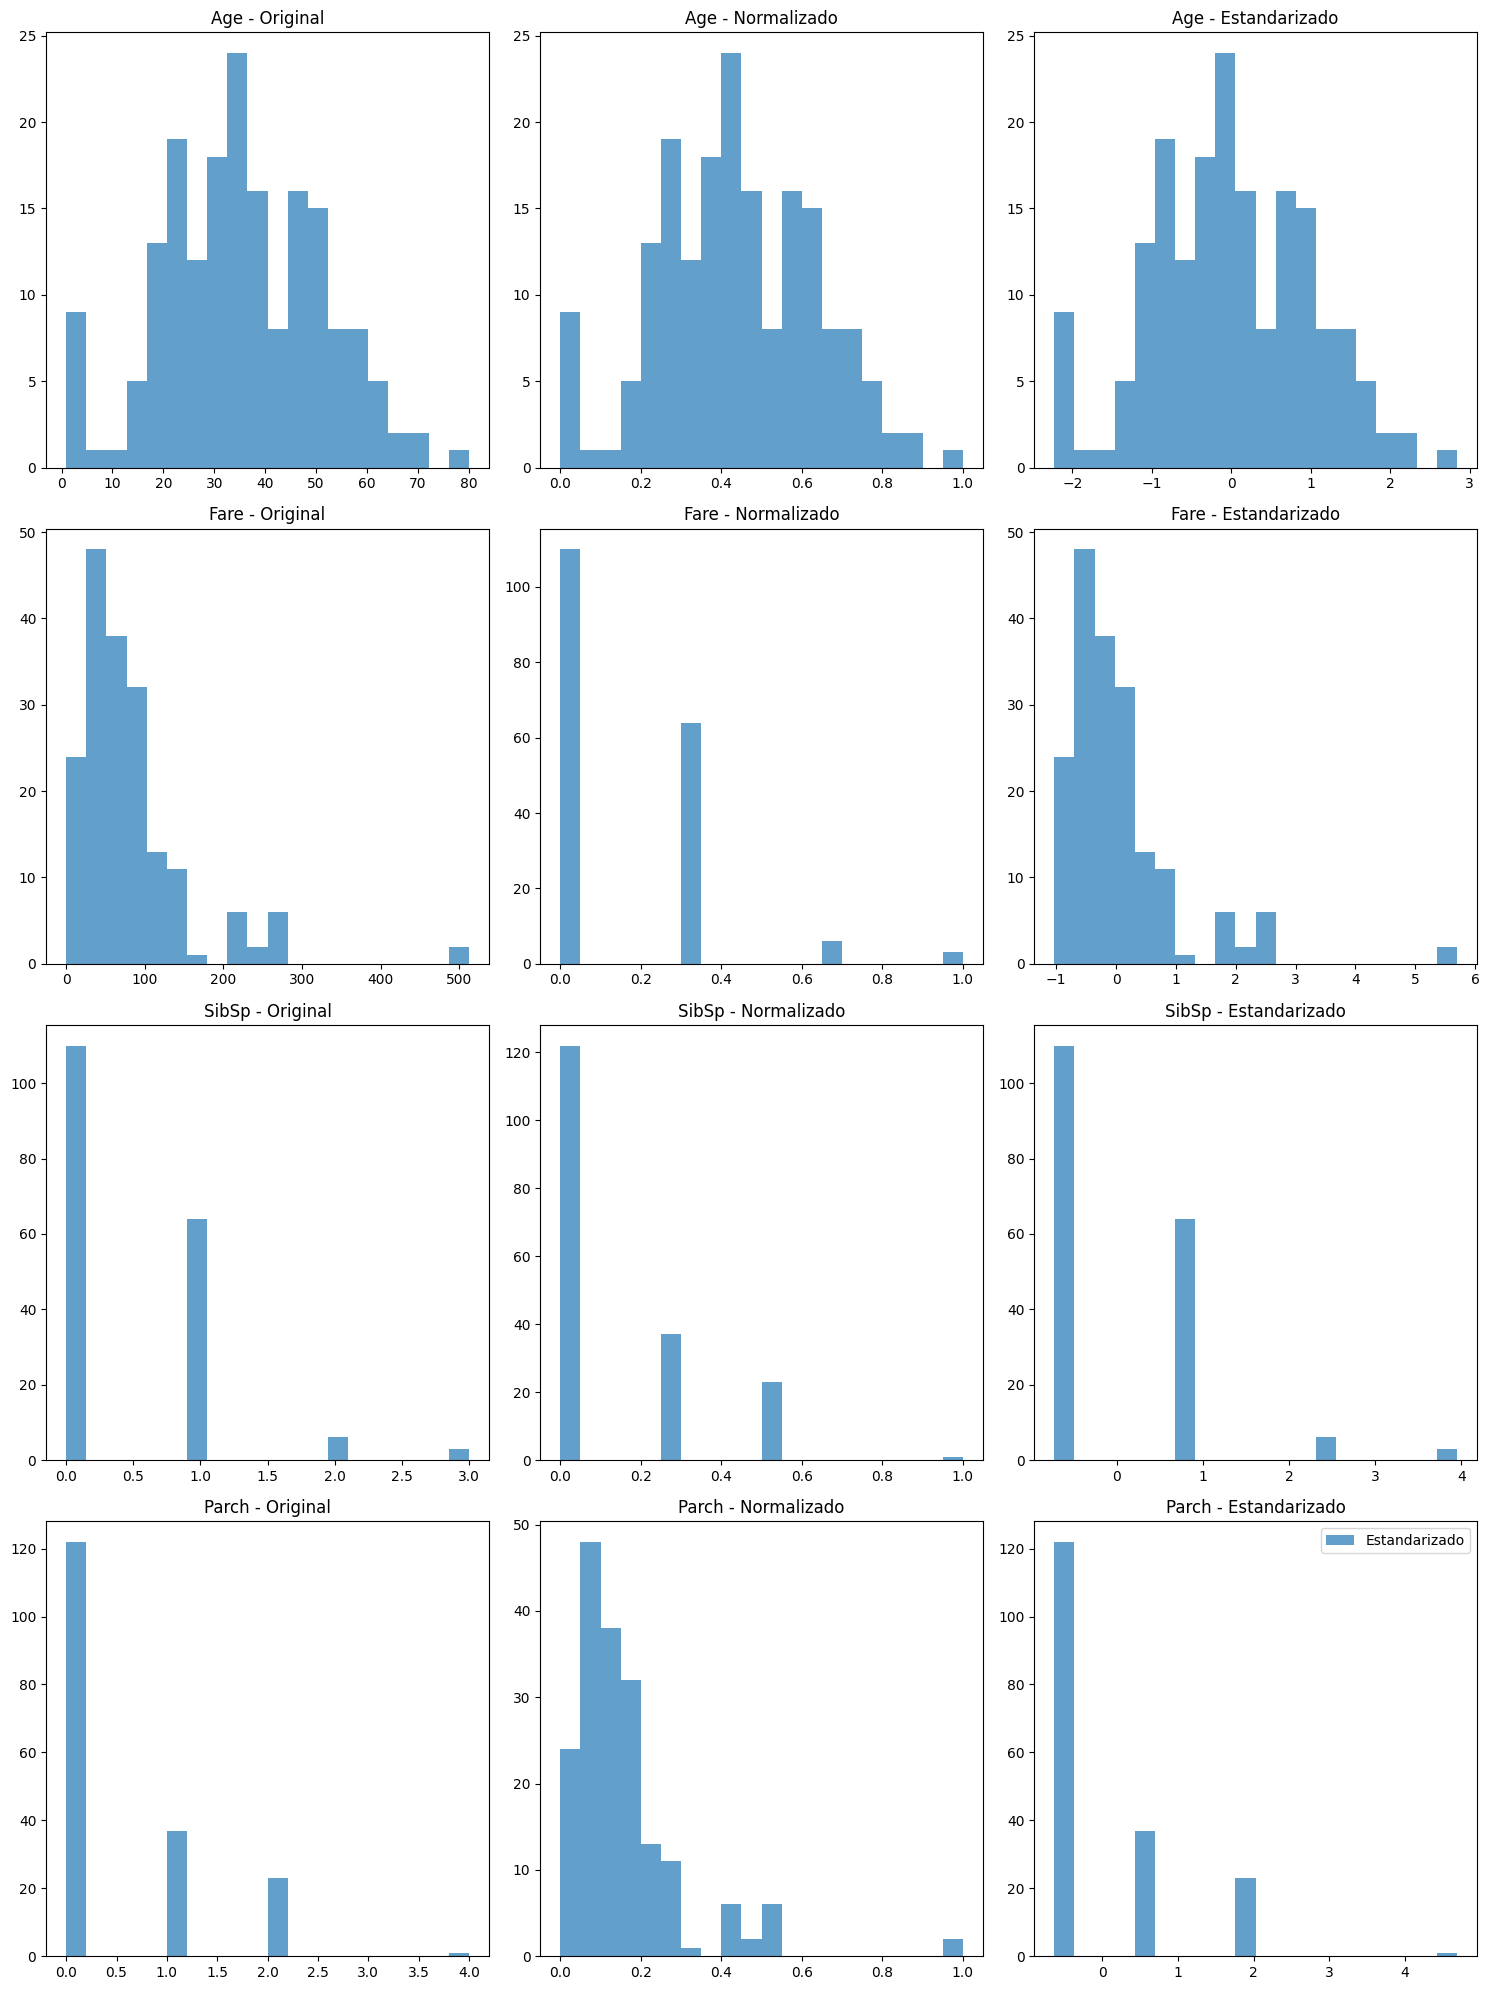

In [143]:
import matplotlib.pyplot as plt

numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Crear subgráficos
fig, ax = plt.subplots(len(numeric_cols), 3, figsize=(15, 5 * len(numeric_cols)))

for i, column in enumerate(numeric_cols):
    ax[i, 0].hist(df[column], bins=20, alpha=0.7, label='Original')
    ax[i, 1].hist(df_normalized[column], bins=20, alpha=0.7, label='Normalizado')
    ax[i, 2].hist(df_standardized[column], bins=20, alpha=0.7, label='Estandarizado')

    ax[i, 0].set_title(f"{column} - Original")
    ax[i, 1].set_title(f"{column} - Normalizado")
    ax[i, 2].set_title(f"{column} - Estandarizado")

plt.legend()
plt.tight_layout()
plt.show()

Conclusion: para algoritmos como KNN, Redes Neuronales, normalizacion es mejor porque preserva las relaciones relativas entre los datos.

Para algoritmos lineales como Regresion Logistica o SVM, estandarizacion es mejor porque los datos resultativos tienen media de 0 y una desviación estándar de 1 (son distribuidos normalmente).